<a href="https://colab.research.google.com/github/JohnnyPunchinello/github-slideshow/blob/master/Emergence_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import torch


file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))



num_layer1 = data[0]["fc1.bias"].size()
num_layer2 = data[0]["fc2.bias"].size()
num_layer3 = data[0]["fc3.bias"].size()
num_layer4 = data[0]["fc4.bias"].size()
num_layer5 = data[0]["fc5.bias"].size()

print(f"The number of No.1 layer is {num_layer1}")
print(f"The number of No.2 second layer is {num_layer2}")
print(f"The number of No.3 second layer is {num_layer3}")
print(f"The number of No.4 second layer is {num_layer4}")
print(f"The number of No.5 second layer is {num_layer5}")



The number of No.1 layer is torch.Size([392])
The number of No.2 second layer is torch.Size([196])
The number of No.3 second layer is torch.Size([98])
The number of No.4 second layer is torch.Size([48])
The number of No.5 second layer is torch.Size([24])


In [ ]:
layer_sizes = [392,196,98,48,24]

In [ ]:
data[0]

{'fc1.weight': tensor([[-0.0267,  0.0027,  0.0112,  ...,  0.0036,  0.0333, -0.0115],
         [ 0.0022, -0.0041,  0.0227,  ...,  0.0239, -0.0038, -0.0004],
         [-0.0204,  0.0325, -0.0149,  ..., -0.0150, -0.0334, -0.0031],
         ...,
         [ 0.0207, -0.0023, -0.0181,  ..., -0.0209,  0.0262, -0.0260],
         [-0.0083,  0.0074, -0.0156,  ..., -0.0334, -0.0245, -0.0186],
         [-0.0206, -0.0158,  0.0142,  ..., -0.0360, -0.0019, -0.0012]]),
 'fc1.bias': tensor([ 2.5438e-02,  2.7716e-02, -3.1279e-02, -2.5890e-02, -2.1130e-02,
         -2.6141e-02, -3.1506e-02, -2.2159e-02, -1.0745e-02,  8.0300e-04,
         -1.9182e-02,  3.8914e-03,  6.8692e-03, -2.4660e-02,  3.4719e-02,
         -1.4925e-03, -1.8024e-02,  1.4438e-03, -3.1144e-02, -2.4586e-02,
         -7.7456e-03, -1.9260e-02,  3.5882e-02, -2.5519e-02,  3.9102e-03,
          3.5258e-02,  1.9661e-02,  2.4889e-02, -2.6478e-02,  8.6315e-03,
          1.7274e-02, -5.1602e-04,  3.9062e-03, -6.8528e-04, -1.7649e-02,
         -4.20

In [ ]:
data[0]["fc1.weight"]

IndexError: ignored

In [ ]:
torch.mean(data[0]["fc2.weight"] - data['global']["fc2.weight"])

tensor(9.0959e-05)

In [ ]:
pip install torch torchvision


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Define your weights and biases here
# Example (replace these with your actual tensors):
#your_weights_1 = torch.randn(784, 250)
your_weights_1 = torch.randn(392,784)
your_weights_1 = data[0]["fc1.weight"]
your_biases_1 = torch.randn(392)
your_biases_1 = data[0]["fc1.bias"]

#your_weights_2 = torch.randn(250, 197)
your_weights_2 = torch.randn(196,392)
your_weights_2 = data[0]["fc2.weight"]
your_biases_2 = torch.randn(196)
your_biases_2 = data[0]["fc2.bias"]


your_weights_3 = torch.randn(98,196)
your_weights_3 = data[0]["fc2.weight"]
your_biases_3 = torch.randn(98)
your_biases_3 = data[0]["fc2.bias"]

your_weights_4 = torch.randn(48,98)
your_weights_4 = data[0]["fc2.weight"]
your_biases_4 = torch.randn(48)
your_biases_4 = data[0]["fc2.bias"]

your_weights_5 = torch.randn(24,48)
your_weights_5 = data[0]["fc2.weight"]
your_biases_5 = torch.randn(24)
your_biases_5 = data[0]["fc2.bias"]



#your_weights_3 = torch.randn(197, 10)
your_weights_6 = torch.randn(10,24)
your_weights_6 = data[0]["classifier.weight"]
your_biases_6 = torch.randn(10)
your_biases_6 = data[0]["classifier.bias"]

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

# Define the MLP model
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(784, 392)
        self.layer2 = torch.nn.Linear(392, 196)
        self.layer3 = torch.nn.Linear(196, 98)
        self.layer4 = torch.nn.Linear(98, 48)
        self.layer5 = torch.nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        a1 = torch.relu(self.layer1(x))
        a2 = torch.relu(self.layer2(a1))
        a3 = torch.relu(self.layer3(a2))
        a4 = torch.relu(self.layer4(a3))
        a5 = torch.relu(self.layer5(a4))
        output = torch.softmax(self.output_layer(a5), dim=1)
        return a1, a2, a3, a4, a5, output

# Initialize the model
model = MLP()

# Set the weights and biases
model.layer1.weight = torch.nn.Parameter(your_weights_1)
model.layer1.bias = torch.nn.Parameter(your_biases_1)

model.layer2.weight = torch.nn.Parameter(your_weights_2)
model.layer2.bias = torch.nn.Parameter(your_biases_2)

model.layer3.weight = torch.nn.Parameter(your_weights_3)
model.layer3.bias = torch.nn.Parameter(your_biases_3)

model.layer4.weight = torch.nn.Parameter(your_weights_4)
model.layer4.bias = torch.nn.Parameter(your_biases_4)

model.layer5.weight = torch.nn.Parameter(your_weights_5)
model.layer5.bias = torch.nn.Parameter(your_biases_5)

model.output_layer.weight = torch.nn.Parameter(your_weights_6)
model.output_layer.bias = torch.nn.Parameter(your_biases_6)

# Fetch one batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass through the model
hidden1_output, hidden2_output, hidden3_output,hidden4_output,hidden5_output,final_output = model(images)

#print("Output of the first hidden layer: ", hidden1_output)
#print("Output of the second hidden layer: ", hidden2_output)
#print("Final output of the network: ", final_output)


RuntimeError: ignored

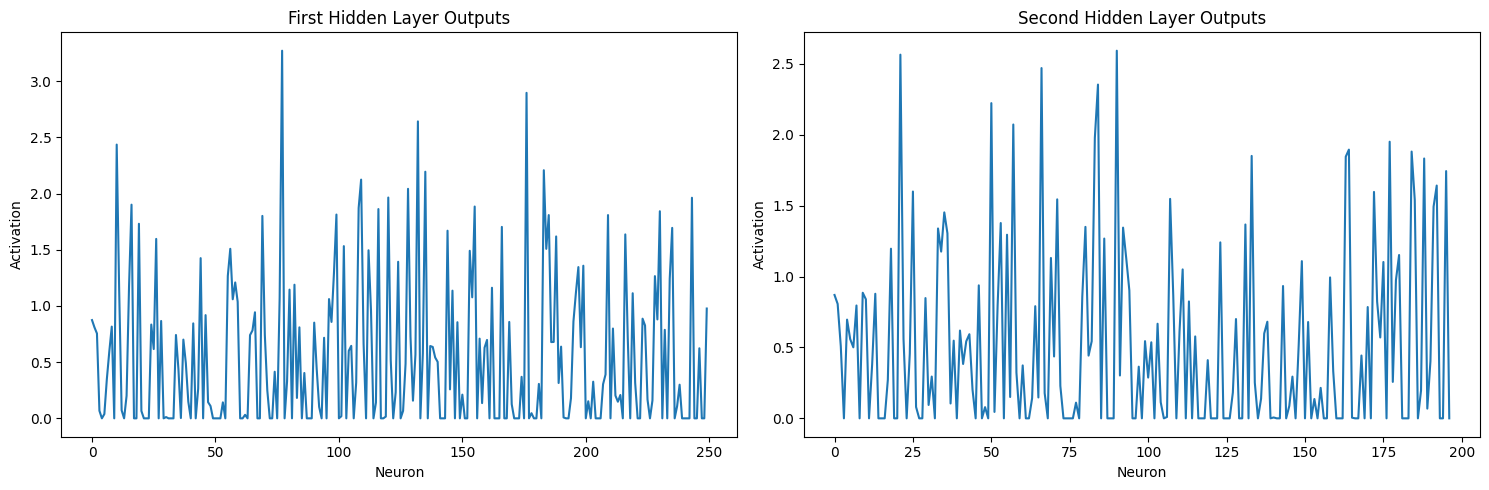

In [ ]:
hidden1_output_np = hidden1_output.detach().numpy().flatten()
hidden2_output_np = hidden2_output.detach().numpy().flatten()

# Plotting
plt.figure(figsize=(15, 5))

# Plot for first hidden layer
plt.subplot(1, 2, 1)
plt.title('First Hidden Layer Outputs')
plt.plot(hidden1_output_np)
plt.xlabel('Neuron')
plt.ylabel('Activation')

# Plot for second hidden layer
plt.subplot(1, 2, 2)
plt.title('Second Hidden Layer Outputs')
plt.plot(hidden2_output_np)
plt.xlabel('Neuron')
plt.ylabel('Activation')

plt.tight_layout()
plt.show()

In [ ]:
# Find indices of neurons with zero output in the first hidden layer
zero_neurons_hidden1 = torch.where(hidden1_output == 0)[1]
print("Indices of neurons with zero output in the first hidden layer:", zero_neurons_hidden1.numpy())

# Find indices of neurons with zero output in the second hidden layer
zero_neurons_hidden2 = torch.where(hidden2_output == 0)[1]
print("Indices of neurons with zero output in the second hidden layer:", zero_neurons_hidden2.numpy())


Indices of neurons with zero output in the first hidden layer: [  4   9  13  17  18  21  22  23  27  29  31  32  33  40  42  45  49  50
  51  52  54  60  61  63  67  68  72  73  75  78  81  85  87  88  89  93
  95 100 103 106 111 114 117 118 122 125 133 136 141 142 143 147 149 151
 152 156 161 163 164 165 167 168 171 172 173 175 177 179 180 182 192 193
 200 202 204 205 206 210 215 218 221 222 226 231 233 236 239 240 241 242
 244 245 247 248]
Indices of neurons with zero output in the second hidden layer: [  3   8  11  14  15  16  19  20  23  27  28  32  39  45  47  49  54  59
  61  62  68  73  74  75  76  78  85  87  88  89  95  96  98 102 105 109
 112 114 116 117 118 120 121 122 124 125 126 129 130 132 135 139 141 142
 144 147 150 152 154 156 157 160 161 162 166 167 169 171 176 181 182 183
 186 193 194 196]


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)  # Batch size can be adjusted


# Initialize lists to store outputs
hidden1_outputs = []
hidden2_outputs = []

# Process the entire dataset
for images, labels in trainloader:
    with torch.no_grad():  # Disable gradient computation
        hidden1_output, hidden2_output, final_output = model(images)
        hidden1_outputs.append(hidden1_output)
        hidden2_outputs.append(hidden2_output)

# Convert lists of tensors to single tensors
hidden1_outputs = torch.cat(hidden1_outputs, dim=0)
hidden2_outputs = torch.cat(hidden2_outputs, dim=0)

# Example: Print the shape of the outputs
print("Shape of first hidden layer outputs:", hidden1_outputs.shape)
print("Shape of second hidden layer outputs:", hidden2_outputs.shape)

# Example: Find indices of neurons with zero output in the first hidden layer of the first batch
zero_neurons_hidden1 = torch.where(hidden1_outputs[1] == 0)[0]  # First batch
print("Indices of neurons with zero output in the first hidden layer of the first batch:", zero_neurons_hidden1.numpy())

Shape of first hidden layer outputs: torch.Size([60000, 250])
Shape of second hidden layer outputs: torch.Size([60000, 197])
Indices of neurons with zero output in the first hidden layer of the first batch: [  9  13  17  18  22  23  27  31  32  33  36  37  39  40  42  45  46  50
  52  53  54  60  61  62  63  64  65  66  67  68  72  73  75  81  83  87
  92  93 100 101 111 114 122 125 133 136 137 142 143 152 156 158 161 163
 165 167 168 172 175 177 179 180 182 192 200 201 202 204 207 212 215 220
 221 222 226 231 236 238 247 248]


In [ ]:
hidden1_output = torch.mean(hidden1_outputs,0)
hidden2_output = torch.mean(hidden2_outputs,0)

In [ ]:
zero_neurons_hidden1 = torch.where(hidden1_output <= 0.001)[0]
zero_neurons_hidden2 = torch.where(hidden2_output <= 0.001)[0]

In [ ]:
print("Indices of neurons with zero output in the first hidden layer:", zero_neurons_hidden1.numpy())
print("Indices of neurons with zero output in the second hidden layer:", zero_neurons_hidden2.numpy())

Indices of neurons with zero output in the first hidden layer: [ 18  23 111 114 136 143 202 222 231]
Indices of neurons with zero output in the second hidden layer: [  3   8  14  15  20  28  39  45  54  62  74  78  85  96  98 102 112 117
 122 124 126 141 144 150 160 161 162 167 169 171 181 194]


In [ ]:
# Now let us process the first part of weights

# Now let us process the second part of weights

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Define your weights and biases here
# Example (replace these with your actual tensors):
#your_weights_1 = torch.randn(784, 250)
your_weights_1 = torch.randn(250,784)
your_weights_1 = data[0]["fc1.weight"]
your_biases_1 = torch.randn(250)
your_biases_1 = data[0]["fc1.bias"]

#your_weights_2 = torch.randn(250, 197)
your_weights_2 = torch.randn(197,250)
your_weights_2 = data[0]["fc2.weight"]
your_biases_2 = torch.randn(197)
your_biases_2 = data[0]["fc2.bias"]

#your_weights_3 = torch.randn(197, 10)
your_weights_3 = torch.randn(10,197)
your_weights_3 = data[0]["classifier.weight"]
your_biases_3 = torch.randn(10)
your_biases_3 = data[0]["classifier.bias"]

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

# Define the MLP model
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(784, 250)
        self.layer2 = torch.nn.Linear(250, 197)
        self.output_layer = torch.nn.Linear(197, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        a1 = torch.relu(self.layer1(x))
        a2 = torch.relu(self.layer2(a1))
        output = torch.softmax(self.output_layer(a2), dim=1)
        return a1, a2, output

# Initialize the model
model = MLP()

# Set the weights and biases
model.layer1.weight = torch.nn.Parameter(your_weights_1)
model.layer1.bias = torch.nn.Parameter(your_biases_1)

model.layer2.weight = torch.nn.Parameter(your_weights_2)
model.layer2.bias = torch.nn.Parameter(your_biases_2)

model.output_layer.weight = torch.nn.Parameter(your_weights_3)
model.output_layer.bias = torch.nn.Parameter(your_biases_3)

# Fetch one batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass through the model
hidden1_output, hidden2_output, final_output = model(images)

#print("Output of the first hidden layer: ", hidden1_output)
#print("Output of the second hidden layer: ", hidden2_output)
#print("Final output of the network: ", final_output)

hidden1_outputs = []
hidden2_outputs = []

# Process the entire dataset
for images, labels in trainloader:
    with torch.no_grad():  # Disable gradient computation
        hidden1_output, hidden2_output, final_output = model(images)
        hidden1_outputs.append(hidden1_output)
        hidden2_outputs.append(hidden2_output)

# Convert lists of tensors to single tensors
hidden1_outputs = torch.cat(hidden1_outputs, dim=0)
hidden2_outputs = torch.cat(hidden2_outputs, dim=0)
zero_neurons_hidden1 = [[] for _ in range(3)]
zero_neurons_hidden2 = [[] for _ in range(3)]

#hidden1_output_ave = torch.tensor([[0]*250,[0]*250,[0]*250])
#hidden2_output_ave = torch.tensor([[0]*197,[0]*197,[0]*197])
hidden1_output_ave_0 = torch.mean(hidden1_outputs,0)
hidden2_output_ave_0 = torch.mean(hidden2_outputs,0)
zero_neurons_hidden1[0] = torch.where(hidden1_output_ave_0 <= 0.001)[0]
zero_neurons_hidden2[0] = torch.where(hidden2_output_ave_0 <= 0.001)[0]
print("Indices of neurons with zero output in the first hidden layer:", zero_neurons_hidden1[0].numpy())
print("Indices of neurons with zero output in the second hidden layer:", zero_neurons_hidden2[0].numpy())


Indices of neurons with zero output in the first hidden layer: [ 18  23 111 114 136 143 202 222 231]
Indices of neurons with zero output in the second hidden layer: [  3   8  14  15  20  28  39  45  54  62  74  78  85  96  98 102 112 117
 122 124 126 141 144 150 160 161 162 167 169 171 181 194]


In [ ]:
zero_neurons_hidden1

[tensor([ 18,  23, 111, 114, 136, 143, 202, 222, 231]), [], []]

In [ ]:
# Now let us process the second part of weights

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Define your weights and biases here
# Example (replace these with your actual tensors):
#your_weights_1 = torch.randn(784, 250)
your_weights_1 = torch.randn(250,784)
your_weights_1 = data[1]["fc1.weight"]
your_biases_1 = torch.randn(250)
your_biases_1 = data[1]["fc1.bias"]

#your_weights_2 = torch.randn(250, 197)
your_weights_2 = torch.randn(197,250)
your_weights_2 = data[1]["fc2.weight"]
your_biases_2 = torch.randn(197)
your_biases_2 = data[1]["fc2.bias"]

#your_weights_3 = torch.randn(197, 10)
your_weights_3 = torch.randn(10,197)
your_weights_3 = data[1]["classifier.weight"]
your_biases_3 = torch.randn(10)
your_biases_3 = data[1]["classifier.bias"]

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

# Define the MLP model
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(784, 250)
        self.layer2 = torch.nn.Linear(250, 197)
        self.output_layer = torch.nn.Linear(197, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        a1 = torch.relu(self.layer1(x))
        a2 = torch.relu(self.layer2(a1))
        output = torch.softmax(self.output_layer(a2), dim=1)
        return a1, a2, output

# Initialize the model
model = MLP()

# Set the weights and biases
model.layer1.weight = torch.nn.Parameter(your_weights_1)
model.layer1.bias = torch.nn.Parameter(your_biases_1)

model.layer2.weight = torch.nn.Parameter(your_weights_2)
model.layer2.bias = torch.nn.Parameter(your_biases_2)

model.output_layer.weight = torch.nn.Parameter(your_weights_3)
model.output_layer.bias = torch.nn.Parameter(your_biases_3)

# Fetch one batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass through the model
hidden1_output, hidden2_output, final_output = model(images)

#print("Output of the first hidden layer: ", hidden1_output)
#print("Output of the second hidden layer: ", hidden2_output)
#print("Final output of the network: ", final_output)

hidden1_outputs = []
hidden2_outputs = []

# Process the entire dataset
for images, labels in trainloader:
    with torch.no_grad():  # Disable gradient computation
        hidden1_output, hidden2_output, final_output = model(images)
        hidden1_outputs.append(hidden1_output)
        hidden2_outputs.append(hidden2_output)

# Convert lists of tensors to single tensors
hidden1_outputs = torch.cat(hidden1_outputs, dim=0)
hidden2_outputs = torch.cat(hidden2_outputs, dim=0)


In [ ]:
hidden1_output_ave_1 = torch.mean(hidden1_outputs,0)
hidden2_output_ave_1 = torch.mean(hidden2_outputs,0)
zero_neurons_hidden1[1] = torch.where(hidden1_output_ave_1 <= 0.001)[0]
zero_neurons_hidden2[1] = torch.where(hidden2_output_ave_1 <= 0.001)[0]
print("Indices of neurons with zero output in the first hidden layer:", zero_neurons_hidden1[1].numpy())
print("Indices of neurons with zero output in the second hidden layer:", zero_neurons_hidden2[1].numpy())

Indices of neurons with zero output in the first hidden layer: [ 18  23  42 119 133 150 152 222]
Indices of neurons with zero output in the second hidden layer: [  5   9  11  15  27  29  31  32  34  45  47  51  53  54  55  56  59  62
  73  74  76  78  79  85  96  98 103 112 116 117 125 126 129 134 139 141
 144 157 160 161 166 181 193]


In [ ]:
# Now let us process the global weights

# Now let us process the second part of weights

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Define your weights and biases here
# Example (replace these with your actual tensors):
#your_weights_1 = torch.randn(784, 250)
your_weights_1 = torch.randn(250,784)
your_weights_1 = data['global']["fc1.weight"]
your_biases_1 = torch.randn(250)
your_biases_1 = data['global']["fc1.bias"]

#your_weights_2 = torch.randn(250, 197)
your_weights_2 = torch.randn(197,250)
your_weights_2 = data['global']["fc2.weight"]
your_biases_2 = torch.randn(197)
your_biases_2 = data['global']["fc2.bias"]

#your_weights_3 = torch.randn(197, 10)
your_weights_3 = torch.randn(10,197)
your_weights_3 = data['global']["classifier.weight"]
your_biases_3 = torch.randn(10)
your_biases_3 = data['global']["classifier.bias"]

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

# Define the MLP model
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(784, 250)
        self.layer2 = torch.nn.Linear(250, 197)
        self.output_layer = torch.nn.Linear(197, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        a1 = torch.relu(self.layer1(x))
        a2 = torch.relu(self.layer2(a1))
        output = torch.softmax(self.output_layer(a2), dim=1)
        return a1, a2, output

# Initialize the model
model = MLP()

# Set the weights and biases
model.layer1.weight = torch.nn.Parameter(your_weights_1)
model.layer1.bias = torch.nn.Parameter(your_biases_1)

model.layer2.weight = torch.nn.Parameter(your_weights_2)
model.layer2.bias = torch.nn.Parameter(your_biases_2)

model.output_layer.weight = torch.nn.Parameter(your_weights_3)
model.output_layer.bias = torch.nn.Parameter(your_biases_3)

# Fetch one batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass through the model
hidden1_output, hidden2_output, final_output = model(images)

#print("Output of the first hidden layer: ", hidden1_output)
#print("Output of the second hidden layer: ", hidden2_output)
#print("Final output of the network: ", final_output)

hidden1_outputs = []
hidden2_outputs = []

# Process the entire dataset
for images, labels in trainloader:
    with torch.no_grad():  # Disable gradient computation
        hidden1_output, hidden2_output, final_output = model(images)
        hidden1_outputs.append(hidden1_output)
        hidden2_outputs.append(hidden2_output)

# Convert lists of tensors to single tensors
hidden1_outputs = torch.cat(hidden1_outputs, dim=0)
hidden2_outputs = torch.cat(hidden2_outputs, dim=0)

hidden1_output_ave_2 = torch.mean(hidden1_outputs,0)
hidden2_output_ave_2 = torch.mean(hidden2_outputs,0)
zero_neurons_hidden1[2] = torch.where(hidden1_output_ave_2 <= 0.001)[0]
zero_neurons_hidden2[2] = torch.where(hidden2_output_ave_2 <= 0.001)[0]
print("Indices of neurons with zero output in the first hidden layer:", zero_neurons_hidden1[2].numpy())
print("Indices of neurons with zero output in the second hidden layer:", zero_neurons_hidden2[2].numpy())


Indices of neurons with zero output in the first hidden layer: [ 18  23  42 119 222]
Indices of neurons with zero output in the second hidden layer: [ 14  15  27  32  45  54  62  74  78  85  96  98 112 116 117 122 126 141
 144 160 161 181]


In [ ]:
hidden1_outputs.size()

torch.Size([60000, 250])

In [ ]:
# now we compute the emergence!
# def emergence

# Now we compute the emergence!!!

def count_paths_dfs(adj_matrix, start, end, visited=None):
    if visited is None:
        visited = set()

    # If start is the end, we've found a path
    if start == end:
        return 1

    # Mark the current node as visited
    visited.add(start)

    path_count = 0
    # Go through the adjacency matrix row for the start node
    for neighbor, is_connected in enumerate(adj_matrix[start]):
        # If there's a connection and the neighbor hasn't been visited
        if is_connected and neighbor not in visited:
            path_count += count_paths_dfs(adj_matrix, neighbor, end, visited.copy())

    # Return the total path count
    return path_count

def emergence_compute(adj_matrix_G,V):

    adjacent_nodes_set = set()
    for node in V:
        # Find the indices of adjacent nodes where there's a connection
        adjacent_nodes = np.where(adj_matrix_G[node, :] != 0)[0]
        # adjacent_nodes = np.where(adj_matrix_G[:, node] != 0)[0]
        #adjacent_nodes_list.append(adjacent_nodes)
        adjacent_nodes_set.update(adjacent_nodes)

    adjacent_nodes_list = sorted(list(adjacent_nodes_set))

    num_nodes = adj_matrix_G.shape[0]



    P_x = [0]*len(adjacent_nodes_list)

    for i in range(len(adjacent_nodes_list)-1):
        for j in range(num_nodes-1):
            P_x[i] = P_x[i] + count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], j)

        for j in range(len(V)-1):
            P_x[i] = P_x[i] - count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], V[j])


    emergence = np.sum(P_x)
    return emergence


In [ ]:
# define the network adj matrix
def generate_adjacency_matrix(layer_sizes):
    """
    Generate the adjacency matrix for a feed-forward network.

    Parameters:
    layer_sizes (list): A list of integers indicating the size of each layer.

    Returns:
    np.array: An adjacency matrix of the feed-forward network.
    """
    total_nodes = sum(layer_sizes)
    adjacency_matrix = np.zeros((total_nodes, total_nodes))

    # Starting index of the first layer is 0
    start_index = 0

    # Iterate over the layers and fill the adjacency matrix
    for i in range(len(layer_sizes) - 1):
        # Size of the current layer and the next layer
        current_layer_size = layer_sizes[i]
        next_layer_size = layer_sizes[i + 1]

        # Indices of the next layer
        end_index = start_index + current_layer_size
        next_layer_start_index = end_index
        next_layer_end_index = next_layer_start_index + next_layer_size

        # Set the connections between current layer and next layer to 1
        for j in range(start_index, end_index):
            adjacency_matrix[j, next_layer_start_index:next_layer_end_index] = 1

        # Update the start index for the next iteration
        start_index = end_index

    return adjacency_matrix

In [ ]:
# define the layer size
#layer_sizes = [250, 197,10]
adj_matrix_G = generate_adjacency_matrix(layer_sizes)

In [ ]:
V0 = torch.cat((zero_neurons_hidden1[0], zero_neurons_hidden2[0]+250),dim=0).tolist()
Emergence0 = emergence_compute(adj_matrix_G, V0)

In [ ]:
V1 = torch.cat((zero_neurons_hidden1[1], zero_neurons_hidden2[1]+250),dim=0).tolist()
Emergence1 = emergence_compute(adj_matrix_G, V1)

In [ ]:
V2 = torch.cat((zero_neurons_hidden1[2], zero_neurons_hidden2[2]+250),dim=0).tolist()
Emergence2 = emergence_compute(adj_matrix_G, V2)

In [ ]:
print(len(V0), Emergence0)
print(len(V1), Emergence1)
print(len(V2), Emergence2)

41 1948
51 1937
27 1958


In [ ]:
# define a new emergence function
def emergence_compute_path(adj_matrix_G,V):

    adjacent_nodes_set = set()
    for node in V:
        # Find the indices of adjacent nodes where there's a connection
        adjacent_nodes = np.where(adj_matrix_G[node, :] != 0)[0]
        # adjacent_nodes = np.where(adj_matrix_G[:, node] != 0)[0]
        #adjacent_nodes_list.append(adjacent_nodes)
        adjacent_nodes_set.update(adjacent_nodes)

    adjacent_nodes_list = sorted(list(adjacent_nodes_set))

    num_nodes = adj_matrix_G.shape[0]



    P_x = [0]*len(adjacent_nodes_list)

    for i in range(len(adjacent_nodes_list)-1):
        for j in range(num_nodes-1):
            P_x[i] = P_x[i] + count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], j)

        for j in range(len(V)-1):
            P_x[i] = P_x[i] - count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], V[j])


    #emergence = np.sum(P_x)
    #emergence = torch.stack(adjacent_nodes_list, P_x)
    return adjacent_nodes_list, P_x


In [ ]:
V0 = torch.cat((zero_neurons_hidden1[0], zero_neurons_hidden2[0]+250),dim=0).tolist()
#Emergence_path_0 = emergence_compute_path(adj_matrix_G, V0)
adjacent_nodes_set = set()
for node in V:
    # Find the indices of adjacent nodes where there's a connection
    adjacent_nodes = np.where(adj_matrix_G[node, :] != 0)[0]
    # adjacent_nodes = np.where(adj_matrix_G[:, node] != 0)[0]
    #adjacent_nodes_list.append(adjacent_nodes)
    adjacent_nodes_set.update(adjacent_nodes)

adjacent_nodes_list = sorted(list(adjacent_nodes_set))

num_nodes = adj_matrix_G.shape[0]



P_x = [0]*len(adjacent_nodes_list)

for i in range(len(adjacent_nodes_list)-1):
    for j in range(num_nodes-1):
        P_x[i] = P_x[i] + count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], j)

    for j in range(len(V)-1):
        P_x[i] = P_x[i] - count_paths_dfs(adj_matrix_G, adjacent_nodes_list[i], V[j])


#emergence = np.sum(P_x)
emergence = stack(adjacent_nodes_list, P_x)

NameError: ignored

In [ ]:
V0 = torch.cat((zero_neurons_hidden1[0], zero_neurons_hidden2[0]+250),dim=0).tolist()
Emergence_path_0 = emergence_compute_path(adj_matrix_G, V0)

In [ ]:
list1 = Emergence_path_0[0]
list2 = Emergence_path_0[1]
list3 = range(250,250+197)
#ind = [item-250 for item in list1 if item in list3 if list2[item]==10]
ind = [item-250 for item in list1 if list2[item-250]==9]
#Emergence_path_0[1]







In [ ]:
diff = torch.mean(data[0]["fc2.weight"] - data['global']["fc2.weight"],1)
#ind = zero_neurons_hidden2[0] - zero_neurons_hidden2[2]
list1 = zero_neurons_hidden2[0].tolist()
list2 = zero_neurons_hidden2[2].tolist()
ind1 = [item for item in ind if item not in list2]
#ind = zero_neurons_hidden2[1]
plt.plot(diff)
plt.plot(ind1, diff[ind1], marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")

In [ ]:
ind

In [ ]:
V1

In [ ]:
# def emergence

# Now we compute the emergence!!!

def count_paths_dfs(adj_matrix, start, end, visited=None):
    if visited is None:
        visited = set()

    # If start is the end, we've found a path
    if start == end:
        return 1

    # Mark the current node as visited
    visited.add(start)

    path_count = 0
    # Go through the adjacency matrix row for the start node
    for neighbor, is_connected in enumerate(adj_matrix[start]):
        # If there's a connection and the neighbor hasn't been visited
        if is_connected and neighbor not in visited:
            path_count += count_paths_dfs(adj_matrix, neighbor, end, visited.copy())

    # Return the total path count
    return path_count

def emergence_compute_NN(adj_matrix_G,zero_neurons_hidden):
    #l  = len(zero_neurons_hidden)
    emergence = 0
    l0 = len(zero_neurons_hidden[0])
    l1 = len(zero_neurons_hidden[1])
    l2 = len(zero_neurons_hidden[2])
    l3 = len(zero_neurons_hidden[3])
    emergence = emergence + l0*(256-l1) + l0*(256-l1)*(256-l2)+l0*(256-l1)*(256-l2)*(128-l3) + l1*(256-l2) + l1*(256-l2)*(128-l3) + l2*(128-l3) + l3
    return emergence



In [165]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST training dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Now, train_loader can be used as the input_data for your network
input_data = train_loader


In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
net.fc1.weight.data = data[0]["fc1.weight"]
net.fc1.bias.data = data[0]["fc1.bias"]

net.fc2.weight.data = data[0]["fc2.weight"]
net.fc2.bias.data = data[0]["fc2.bias"]

net.fc3.weight.data = data[0]["fc3.weight"]
net.fc3.bias.data = data[0]["fc3.bias"]

net.fc4.weight.data = data[0]["fc4.weight"]
net.fc4.bias.data = data[0]["fc4.bias"]

net.fc5.weight.data = data[0]["fc5.weight"]
net.fc5.bias.data = data[0]["fc5.bias"]

net.fc5.weight.data = data[0]["fc5.weight"]
net.fc5.bias.data = data[0]["fc5.bias"]

net.output_layer.weight.data = data[0]["classifier.weight"]
net.output_layer.bias.data = data[0]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...

# Step 4: Process the MNIST Dataset
for Data, target in train_loader:
    net.activations = []  # Reset activations
    output = net(Data)

    # Now net.activations contains the activations for this batch
    # Process or save these activations as needed

    # Example: Print the activations of the first layer for the first image in the batch
    #print(net.activations[0][0])  # Activations of the first layer for the first image
    #break  # Remove this break to process the entire dataset
len(net.activations[0][0])

<ipython-input-155-8326943397f4>:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


392

In [166]:
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=True)


In [167]:

correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = net(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy}%')


<ipython-input-155-8326943397f4>:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


Accuracy of the network on the 10000 test images: 49.29%


In [169]:
len(net.activations[0])

32

In [170]:
len(torch.mean(net.activations[0],0))

392

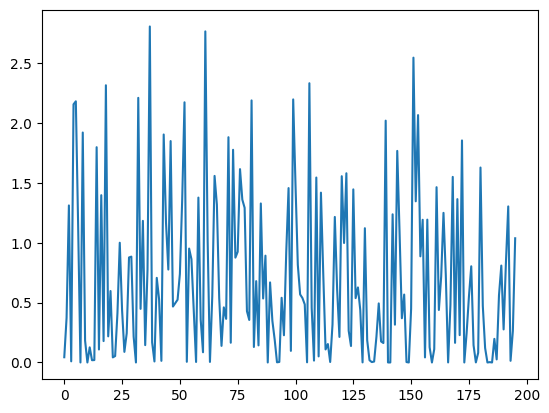

In [171]:
import matplotlib.pyplot as plt
plt.plot(torch.mean(net.activations[1],0).detach().numpy())

In [180]:
zero_neurons_hidden = [[] for _ in range(6)]

In [173]:
ave_activation0 = torch.mean(net.activations[0],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[0] = torch.where(torch.absolute(ave_activation0) <= 0.001)[0]
zero_neurons_hidden[0]

tensor([ 18, 388])

In [175]:
ave_activation1 = torch.mean(net.activations[1],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[1] = torch.where(torch.absolute(ave_activation1) <= 0.001)[0]
zero_neurons_hidden[1]

tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])

In [182]:
ave_activation0 = torch.mean(net.activations[0],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[0] = torch.where(torch.absolute(ave_activation0) <= 0.001)[0]
print(zero_neurons_hidden[0])
ve_activation1 = torch.mean(net.activations[1],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[1] = torch.where(torch.absolute(ave_activation1) <= 0.001)[0]
print(zero_neurons_hidden[1])
ave_activation2 = torch.mean(net.activations[2],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[2] = torch.where(torch.absolute(ave_activation2) <= 0.001)[0]
print(zero_neurons_hidden[2])
ave_activation3 = torch.mean(net.activations[3],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[3] = torch.where(torch.absolute(ave_activation3) <= 0.001)[0]
print(zero_neurons_hidden[3])
ave_activation4= torch.mean(net.activations[4],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[4] = torch.where(torch.absolute(ave_activation4) <= 0.001)[0]
print(zero_neurons_hidden[4])
ave_activation5 = torch.mean(net.activations[5],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[5] = torch.where(torch.absolute(ave_activation5) <= 0.001)[0]
print(zero_neurons_hidden[5])

tensor([ 18, 388])
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 1, 11, 27, 34, 37, 43, 44, 46, 51, 52, 56, 60, 67, 86, 91, 97])
tensor([ 1,  7, 17, 20, 28, 36, 40, 41, 44, 45])
tensor([ 4,  6, 17, 21])
tensor([5, 6, 7, 8, 9])


In [ ]:
layer_sizes

[392, 196, 98, 48, 24]

In [105]:
import pickle
import torch


file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))



num_layer1 = data[0]["fc1.bias"].size()
num_layer2 = data[0]["fc2.bias"].size()
num_layer3 = data[0]["fc3.bias"].size()
num_layer4 = data[0]["fc4.bias"].size()
num_layer5 = data[0]["fc5.bias"].size()

print(f"The number of No.1 layer is {num_layer1}")
print(f"The number of No.2 second layer is {num_layer2}")
print(f"The number of No.3 second layer is {num_layer3}")
print(f"The number of No.4 second layer is {num_layer4}")
print(f"The number of No.5 second layer is {num_layer5}")



The number of No.1 layer is torch.Size([392])
The number of No.2 second layer is torch.Size([196])
The number of No.3 second layer is torch.Size([98])
The number of No.4 second layer is torch.Size([48])
The number of No.5 second layer is torch.Size([24])


In [198]:
# define the network adj matrix
def generate_adjacency_matrix(layer_sizes):
    """
    Generate the adjacency matrix for a feed-forward network.

    Parameters:
    layer_sizes (list): A list of integers indicating the size of each layer.

    Returns:
    np.array: An adjacency matrix of the feed-forward network.
    """
    total_nodes = sum(layer_sizes)
    adjacency_matrix = np.zeros((total_nodes, total_nodes))

    # Starting index of the first layer is 0
    start_index = 0

    # Iterate over the layers and fill the adjacency matrix
    for i in range(len(layer_sizes) - 1):
        # Size of the current layer and the next layer
        current_layer_size = layer_sizes[i]
        next_layer_size = layer_sizes[i + 1]

        # Indices of the next layer
        end_index = start_index + current_layer_size
        next_layer_start_index = end_index
        next_layer_end_index = next_layer_start_index + next_layer_size

        # Set the connections between current layer and next layer to 1
        for j in range(start_index, end_index):
            adjacency_matrix[j, next_layer_start_index:next_layer_end_index] = 1

        # Update the start index for the next iteration
        start_index = end_index

    return adjacency_matrix

In [185]:
# define the layer size
adj_matrix_G = generate_adjacency_matrix(layer_sizes)

In [196]:
# def emergence

# Now we compute the emergence!!!

def count_paths_dfs(adj_matrix, start, end, visited=None):
    if visited is None:
        visited = set()

    # If start is the end, we've found a path
    if start == end:
        return 1

    # Mark the current node as visited
    visited.add(start)

    path_count = 0
    # Go through the adjacency matrix row for the start node
    for neighbor, is_connected in enumerate(adj_matrix[start]):
        # If there's a connection and the neighbor hasn't been visited
        if is_connected and neighbor not in visited:
            path_count += count_paths_dfs(adj_matrix, neighbor, end, visited.copy())

    # Return the total path count
    return path_count

def emergence_compute_NN(adj_matrix_G,zero_neurons_hidden,layer_sizes):
    #l  = len(zero_neurons_hidden)
    emergence = 0
    l0 = len(zero_neurons_hidden[0])
    l1 = len(zero_neurons_hidden[1])
    l2 = len(zero_neurons_hidden[2])
    l3 = len(zero_neurons_hidden[3])
    l4 = len(zero_neurons_hidden[4])
    # paths in the first layer
    emergence = emergence + l0*(layer_sizes[1]-l1) + l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)+l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)*(layer_sizes[3]-l3) + l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the second layer
    emergence = emergence + l1*(layer_sizes[2]-l2)+l1*(layer_sizes[2]-l2)*(layer_sizes[3]-l3) + l1*(layer_sizes[2]-l2)*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the third layer
    emergence = emergence + l2*(layer_sizes[3]-l3)+ l2*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the fourth layer
    emergence = emergence + l3*(layer_sizes[4]-l4)
    #pths in the fifth layer
    emergence = emergence + l4
    return emergence

def emergence_compute_NN_layers(adj_matrix_G,zero_neurons_hidden,layer_sizes):
    #l  = len(zero_neurons_hidden)
    emergence = [0]*len(zero_neurons_hidden)
    l0 = len(zero_neurons_hidden[0])
    l1 = len(zero_neurons_hidden[1])
    l2 = len(zero_neurons_hidden[2])
    l3 = len(zero_neurons_hidden[3])
    l4 = len(zero_neurons_hidden[4])
    # paths in the first layer
    emergence[0] = l0*(layer_sizes[1]-l1) + l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)+l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)*(layer_sizes[3]-l3) + l0*(layer_sizes[1]-l1)*(layer_sizes[2]-l2)*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the second layer
    emergence[1] = l1*(layer_sizes[2]-l2)+l1*(layer_sizes[2]-l2)*(layer_sizes[3]-l3) + l1*(layer_sizes[2]-l2)*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the third layer
    emergence[2] = l2*(layer_sizes[3]-l3)+ l2*(layer_sizes[3]-l3)*(layer_sizes[4]-l4)
    #paths in the fourth layer
    emergence[3] = l3*(layer_sizes[4]-l4)
    #pths in the fifth layer
    emergence[4] = l4
    return emergence


In [189]:
layer_sizes

[392, 196, 98, 48, 24]

In [199]:
emergence = emergence_compute_NN_layers(adj_matrix_G,zero_neurons_hidden,layer_sizes)
emergence

[23848916, 917252, 12768, 200, 4, 0]

In [211]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))


# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
net.fc1.weight.data = data[1]["fc1.weight"]
net.fc1.bias.data = data[1]["fc1.bias"]

net.fc2.weight.data = data[1]["fc2.weight"]
net.fc2.bias.data = data[1]["fc2.bias"]

net.fc3.weight.data = data[1]["fc3.weight"]
net.fc3.bias.data = data[1]["fc3.bias"]

net.fc4.weight.data = data[1]["fc4.weight"]
net.fc4.bias.data = data[1]["fc4.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.output_layer.weight.data = data[1]["classifier.weight"]
net.output_layer.bias.data = data[1]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...

# Step 4: Process the MNIST Dataset
for Data, target in train_loader:
    net.activations = []  # Reset activations
    output = net(Data)

    # Now net.activations contains the activations for this batch
    # Process or save these activations as needed

    # Example: Print the activations of the first layer for the first image in the batch
    #print(net.activations[0][0])  # Activations of the first layer for the first image
    #break  # Remove this break to process the entire dataset
len(net.activations[0][0])

<ipython-input-211-bf1e9e2e09f8>:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


392

In [212]:
ave_activation0 = torch.mean(net.activations[0],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[0] = torch.where(torch.absolute(ave_activation0) <= 0.001)[0]
print(zero_neurons_hidden[0])
ve_activation1 = torch.mean(net.activations[1],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[1] = torch.where(torch.absolute(ave_activation1) <= 0.001)[0]
print(zero_neurons_hidden[1])
ave_activation2 = torch.mean(net.activations[2],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[2] = torch.where(torch.absolute(ave_activation2) <= 0.001)[0]
print(zero_neurons_hidden[2])
ave_activation3 = torch.mean(net.activations[3],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[3] = torch.where(torch.absolute(ave_activation3) <= 0.001)[0]
print(zero_neurons_hidden[3])
ave_activation4= torch.mean(net.activations[4],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[4] = torch.where(torch.absolute(ave_activation4) <= 0.001)[0]
print(zero_neurons_hidden[4])
ave_activation5 = torch.mean(net.activations[5],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[5] = torch.where(torch.absolute(ave_activation5) <= 0.001)[0]
print(zero_neurons_hidden[5])

tensor([ 18,  81, 290, 388])
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 3, 12, 27, 37, 43, 44, 51, 52, 53, 60, 67, 84, 88, 90, 96, 97])
tensor([ 0,  7, 11, 15, 17, 27, 28, 30, 31, 35, 41])
tensor([ 4, 11, 17])
tensor([0, 1, 2, 3, 4])


In [204]:
emergence = emergence_compute_NN_layers(adj_matrix_G,zero_neurons_hidden,layer_sizes)
emergence


[23848916, 917252, 12768, 200, 4, 0]

In [ ]:
# splitted, data[0]
[23848916, 917252, 12768, 200, 4, 0]
tensor([ 18, 388])
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 1, 11, 27, 34, 37, 43, 44, 46, 51, 52, 56, 60, 67, 86, 91, 97])
tensor([ 1,  7, 17, 20, 28, 36, 40, 41, 44, 45])
tensor([ 4,  6, 17, 21])
tensor([5, 6, 7, 8, 9])

In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_no_split.pkl","rb"))


# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
net.fc1.weight.data = data[1]["fc1.weight"]
net.fc1.bias.data = data[1]["fc1.bias"]

net.fc2.weight.data = data[1]["fc2.weight"]
net.fc2.bias.data = data[1]["fc2.bias"]

net.fc3.weight.data = data[1]["fc3.weight"]
net.fc3.bias.data = data[1]["fc3.bias"]

net.fc4.weight.data = data[1]["fc4.weight"]
net.fc4.bias.data = data[1]["fc4.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.output_layer.weight.data = data[1]["classifier.weight"]
net.output_layer.bias.data = data[1]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...

# Step 4: Process the MNIST Dataset
for Data, target in train_loader:
    net.activations = []  # Reset activations
    output = net(Data)

    # Now net.activations contains the activations for this batch
    # Process or save these activations as needed

    # Example: Print the activations of the first layer for the first image in the batch
    #print(net.activations[0][0])  # Activations of the first layer for the first image
    #break  # Remove this break to process the entire dataset
len(net.activations[0][0])

<ipython-input-257-75e8153b967f>:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


392

In [206]:
ave_activation0 = torch.mean(net.activations[0],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[0] = torch.where(torch.absolute(ave_activation0) <= 0.001)[0]
print(zero_neurons_hidden[0])
ve_activation1 = torch.mean(net.activations[1],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[1] = torch.where(torch.absolute(ave_activation1) <= 0.001)[0]
print(zero_neurons_hidden[1])
ave_activation2 = torch.mean(net.activations[2],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[2] = torch.where(torch.absolute(ave_activation2) <= 0.001)[0]
print(zero_neurons_hidden[2])
ave_activation3 = torch.mean(net.activations[3],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[3] = torch.where(torch.absolute(ave_activation3) <= 0.001)[0]
print(zero_neurons_hidden[3])
ave_activation4= torch.mean(net.activations[4],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[4] = torch.where(torch.absolute(ave_activation4) <= 0.001)[0]
print(zero_neurons_hidden[4])
ave_activation5 = torch.mean(net.activations[5],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[5] = torch.where(torch.absolute(ave_activation5) <= 0.001)[0]
print(zero_neurons_hidden[5])

tensor([], dtype=torch.int64)
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 3, 14, 27, 37, 51, 53, 60, 67, 84, 97])
tensor([17, 28, 30, 41])
tensor([ 4,  6, 17])
tensor([], dtype=torch.int64)


In [207]:
emergence = emergence_compute_NN_layers(adj_matrix_G,zero_neurons_hidden,layer_sizes)
emergence


[0, 1193808, 9680, 84, 3, 0]

In [ ]:
# splitted, data[1]
[23848916, 917252, 12768, 200, 4, 0]
tensor([ 18, 168, 290, 388])
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 3, 11, 12, 14, 27, 37, 43, 44, 51, 52, 60, 67, 84, 86, 88, 90, 96, 97])
tensor([ 0,  7, 10, 11, 15, 17, 20, 27, 28, 30, 31, 35, 41])
tensor([ 4, 11, 17])
tensor([0, 1, 2, 3, 4])

In [ ]:
# combined, data[1]
[0, 1193808, 9680, 84, 3, 0]
tensor([], dtype=torch.int64)
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 3, 14, 27, 37, 51, 53, 60, 67, 84, 97])
tensor([17, 28, 30, 41])
tensor([ 4,  6, 17])
tensor([], dtype=torch.int64)

In [208]:
# splitted, data[0]
[23848916, 917252, 12768, 200, 4, 0]
tensor([ 18, 388])
tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185])
tensor([ 1, 11, 27, 34, 37, 43, 44, 46, 51, 52, 56, 60, 67, 86, 91, 97])
tensor([ 1,  7, 17, 20, 28, 36, 40, 41, 44, 45])
tensor([ 4,  6, 17, 21])
tensor([5, 6, 7, 8, 9])

NameError: ignored

In [227]:
zero_neurons_hidden

[tensor([ 18,  81, 290, 388]),
 tensor([  7,  10,  31,  88, 129, 140, 141, 149, 159, 166, 173, 178, 183, 185]),
 tensor([ 3, 12, 27, 37, 43, 44, 51, 52, 53, 60, 67, 84, 88, 90, 96, 97]),
 tensor([ 0,  7, 11, 15, 17, 27, 28, 30, 31, 35, 41]),
 tensor([ 4, 11, 17]),
 tensor([0, 1, 2, 3, 4])]

In [229]:
layer_sizes

[392, 196, 98, 48, 24]

In [241]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))

data_new = data

# layer 1
len(data_new[1]['fc1.weight'])

784

In [339]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))

data_new = data

# layer 1
for i in range(len(zero_neurons_hidden[0])):
    data_new[0]['fc1.weight'][zero_neurons_hidden[0][i],:] =  data[1]['fc1.weight'][zero_neurons_hidden[0][i],:]
    data_new[0]['fc1.bias'][zero_neurons_hidden[0][i]] =  data[1]['fc1.bias'][zero_neurons_hidden[0][i]]

# layer 2
for i in range(len(zero_neurons_hidden[1])):
    data_new[0]['fc2.weight'][zero_neurons_hidden[1][i],:] =  data[1]['fc2.weight'][zero_neurons_hidden[1][i],:]
    data_new[0]['fc2.bias'][zero_neurons_hidden[1][i]] =  data[1]['fc2.bias'][zero_neurons_hidden[1][i]]

# layer 3
for i in range(len(zero_neurons_hidden[2])):
    data_new[0]['fc3.weight'][zero_neurons_hidden[2][i],:] =  data[1]['fc3.weight'][zero_neurons_hidden[2][i],:]
    data_new[0]['fc3.bias'][zero_neurons_hidden[2][i]] =  data[1]['fc3.bias'][zero_neurons_hidden[2][i]]
# layer 4
for i in range(len(zero_neurons_hidden[3])):
    data_new[0]['fc4.weight'][zero_neurons_hidden[3][i],:] =  data[1]['fc4.weight'][zero_neurons_hidden[3][i],:]
    data_new[0]['fc4.bias'][zero_neurons_hidden[3][i]] =  data[1]['fc4.bias'][zero_neurons_hidden[3][i]]
# layer 5
for i in range(len(zero_neurons_hidden[4])):
    data_new[0]['fc5.weight'][zero_neurons_hidden[4][i],:] =  data[1]['fc5.weight'][zero_neurons_hidden[4][i],:]
    data_new[0]['fc5.bias'][zero_neurons_hidden[4][i]] =  data[1]['fc5.bias'][zero_neurons_hidden[4][i]]

# layer 6
#data_new[0]['classifier.weight'][0:4,:] =  data[0]['classifier.weight'][0:4,:]
data_new[0]['classifier.weight'] =  (data[0]['classifier.weight']+ data[1]['classifier.weight'])/2
data_new[0]['classifier.bias'] =  (data[0]['classifier.bias']+ data[1]['classifier.bias'])/2
#for i in range(len(zero_neurons_hidden[5])):
#    data_new[0]['classifier.weight'][zero_neurons_hidden[5][i],:] =  data[0]['classifier.weight'][zero_neurons_hidden[5][i],:]
#    data_new[0]['classifier.bias'][zero_neurons_hidden[5][i]] =  data[0]['classifier.bias'][zero_neurons_hidden[5][i]]

In [355]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))

data_new = data

# layer 1
for i in range(len(zero_neurons_hidden[0])):
    data_new[1]['fc1.weight'][zero_neurons_hidden[0][i],:] =  data[0]['fc1.weight'][zero_neurons_hidden[0][i],:]
    data_new[1]['fc1.bias'][zero_neurons_hidden[0][i]] =  data[0]['fc1.bias'][zero_neurons_hidden[0][i]]

# layer 2
for i in range(len(zero_neurons_hidden[1])):
    data_new[1]['fc2.weight'][zero_neurons_hidden[1][i],:] =  data[0]['fc2.weight'][zero_neurons_hidden[1][i],:]
    data_new[1]['fc2.bias'][zero_neurons_hidden[1][i]] =  data[0]['fc2.bias'][zero_neurons_hidden[1][i]]

# layer 3
for i in range(len(zero_neurons_hidden[2])):
    data_new[1]['fc3.weight'][zero_neurons_hidden[2][i],:] =  data[0]['fc3.weight'][zero_neurons_hidden[2][i],:]
    data_new[1]['fc3.bias'][zero_neurons_hidden[2][i]] =  data[0]['fc3.bias'][zero_neurons_hidden[2][i]]
# layer 4
for i in range(len(zero_neurons_hidden[3])):
    data_new[1]['fc4.weight'][zero_neurons_hidden[3][i],:] =  data[0]['fc4.weight'][zero_neurons_hidden[3][i],:]
    data_new[1]['fc4.bias'][zero_neurons_hidden[3][i]] =  data[0]['fc4.bias'][zero_neurons_hidden[3][i]]
# layer 5
for i in range(len(zero_neurons_hidden[4])):
    data_new[1]['fc5.weight'][zero_neurons_hidden[4][i],:] =  data[0]['fc5.weight'][zero_neurons_hidden[4][i],:]
    data_new[1]['fc5.bias'][zero_neurons_hidden[4][i]] =  data[0]['fc5.bias'][zero_neurons_hidden[4][i]]

# layer 6
#data_new[0]['classifier.weight'][0:4,:] =  data[0]['classifier.weight'][0:4,:]
#data_new[1]['classifier.weight'] =  (data[0]['classifier.weight']+ data[1]['classifier.weight'])/2
#data_new[1]['classifier.bias'] =  (data[0]['classifier.bias']+ data[1]['classifier.bias'])/2
#for i in range(len(zero_neurons_hidden[5])):
#    data_new[0]['classifier.weight'][zero_neurons_hidden[5][i],:] =  data[0]['classifier.weight'][zero_neurons_hidden[5][i],:]
#    data_new[0]['classifier.bias'][zero_neurons_hidden[5][i]] =  data[0]['classifier.bias'][zero_neurons_hidden[5][i]]

In [352]:
zero_neurons_hidden


[tensor([ 11,  14,  18,  24,  33,  36,  38,  40,  42,  51,  54,  75,  81,  83,
          88,  95,  99, 122, 156, 168, 180, 198, 204, 220, 221, 228, 238, 264,
         266, 281, 287, 289, 290, 294, 297, 300, 327, 328, 331, 352, 356, 367,
         371, 373, 388, 389]),
 tensor([  0,   3,   7,  10,  12,  13,  21,  22,  26,  31,  39,  42,  53,  57,
          60,  63,  88,  92,  93,  98, 105, 108, 110, 115, 129, 132, 133, 134,
         140, 141, 148, 149, 156, 159, 166, 173, 178, 179, 183, 184, 185, 187,
         193]),
 tensor([ 3, 11, 12, 14, 27, 34, 37, 43, 44, 51, 52, 53, 60, 66, 67, 84, 86, 88,
         90, 96, 97]),
 tensor([ 0,  7, 10, 11, 15, 17, 20, 27, 28, 30, 31, 35, 41]),
 tensor([ 4, 11, 17, 22]),
 tensor([0, 1, 2, 3, 4])]

In [356]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))


# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
ind = 1 #the model we take

net.fc1.weight.data = data_new[ind]["fc1.weight"]
net.fc1.bias.data = data_new[ind]["fc1.bias"]

net.fc2.weight.data = data_new[ind]["fc2.weight"]
net.fc2.bias.data = data_new[ind]["fc2.bias"]

net.fc3.weight.data = data_new[ind]["fc3.weight"]
net.fc3.bias.data = data_new[ind]["fc3.bias"]

net.fc4.weight.data = data_new[ind]["fc4.weight"]
net.fc4.bias.data = data_new[ind]["fc4.bias"]

net.fc5.weight.data = data_new[ind]["fc5.weight"]
net.fc5.bias.data = data_new[ind]["fc5.bias"]

net.fc5.weight.data = data_new[ind]["fc5.weight"]
net.fc5.bias.data = data_new[ind]["fc5.bias"]

net.output_layer.weight.data = data_new[ind]["classifier.weight"]
net.output_layer.bias.data = data_new[ind]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...



In [357]:
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = net(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy}%')


<ipython-input-356-119ef5cc1f6c>:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


Accuracy of the network on the 10000 test images: 46.89%


In [255]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))


# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor()
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
net.fc1.weight.data = data[1]["fc1.weight"]
net.fc1.bias.data = data[1]["fc1.bias"]

net.fc2.weight.data = data[1]["fc2.weight"]
net.fc2.bias.data = data[1]["fc2.bias"]

net.fc3.weight.data = data[1]["fc3.weight"]
net.fc3.bias.data = data[1]["fc3.bias"]

net.fc4.weight.data = data[1]["fc4.weight"]
net.fc4.bias.data = data[1]["fc4.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.output_layer.weight.data = data[1]["classifier.weight"]
net.output_layer.bias.data = data[1]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...


In [222]:
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = net(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy}%')


<ipython-input-221-bf1e9e2e09f8>:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


Accuracy of the network on the 10000 test images: 46.93%


In [333]:


thre = 0.1 # threshold
ave_activation0 = torch.mean(activations_fix[0],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[0] = torch.where(torch.absolute(ave_activation0) <= thre)[0]
print(len(zero_neurons_hidden[0]))
ve_activation1 = torch.mean(activations_fix[1],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[1] = torch.where(torch.absolute(ave_activation1) <= thre)[0]
print(len(zero_neurons_hidden[1]))
ave_activation2 = torch.mean(activations_fix[2],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[2] = torch.where(torch.absolute(ave_activation2) <= thre)[0]
print(len(zero_neurons_hidden[2]))
ave_activation3 = torch.mean(activations_fix[3],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[3] = torch.where(torch.absolute(ave_activation3) <= thre)[0]
print(len(zero_neurons_hidden[3]))
ave_activation4= torch.mean(activations_fix[4],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[4] = torch.where(torch.absolute(ave_activation4) <= thre)[0]
print(len(zero_neurons_hidden[4]))
ave_activation5 = torch.mean(activations_fix[5],0)
#plt.plot(ave_activation0)
zero_neurons_hidden[5] = torch.where(torch.absolute(ave_activation5) <= thre)[0]
print(zero_neurons_hidden[5])
print(layer_sizes)

46
43
21
13
4
tensor([0, 1, 2, 3, 4])
[392, 196, 98, 48, 24]


In [326]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

file_path = ""
#data = pickle.load(open("/home/chenyang/emergence_ml/FL-code/sync_framework/logs/mnist/seed4321/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
#data = pickle.load(open("/content/alpha0.0.fedavg.tc2.sc2.u0.pkl","rb"))
data = pickle.load(open("/content/data/weights_with_split.pkl","rb"))


# Step 1: Load the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 2: Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28*28, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 48)
        self.fc5 = nn.Linear(48, 24)
        self.output_layer = torch.nn.Linear(24, 10)
        # Add more layers as needed

        # Store activations
        self.activations = []

    def forward(self, x):
        x = x.view(-1, 28*28)

        # Capture activations
        x = F.relu(self.fc1(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc2(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc3(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc4(x))
        self.activations.append(x.clone())

        x = F.relu(self.fc5(x))
        self.activations.append(x.clone())

        x = F.softmax(self.output_layer(x))
        self.activations.append(x.clone())


        # Continue for additional layers
        # ...

        return x

net = Net()

# Step 3: Initialize with Your Provided Weights
# Example:
#your_weight_matrix_for_fc1 =  data[0]["fc1.weight"]
#net.fc1.weight.data = torch.tensor(your_weight_matrix_for_fc1)
net.fc1.weight.data = data[1]["fc1.weight"]
net.fc1.bias.data = data[1]["fc1.bias"]

net.fc2.weight.data = data[1]["fc2.weight"]
net.fc2.bias.data = data[1]["fc2.bias"]

net.fc3.weight.data = data[1]["fc3.weight"]
net.fc3.bias.data = data[1]["fc3.bias"]

net.fc4.weight.data = data[1]["fc4.weight"]
net.fc4.bias.data = data[1]["fc4.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.fc5.weight.data = data[1]["fc5.weight"]
net.fc5.bias.data = data[1]["fc5.bias"]

net.output_layer.weight.data = data[1]["classifier.weight"]
net.output_layer.bias.data = data[1]["classifier.bias"]

# net.fc2.weight.data = torch.tensor(your_weight_matrix_for_fc2)
# ... continue for all layers ...

# Step 4: Process the MNIST Dataset
for Data, target in train_loader:
    net.activations = []  # Reset activations
    output = net(Data)

    # Now net.activations contains the activations for this batch
    # Process or save these activations as needed

    # Example: Print the activations of the first layer for the first image in the batch
    #print(net.activations[0][0])  # Activations of the first layer for the first image
    #break  # Remove this break to process the entire dataset
len(net.activations[0][0])

<ipython-input-326-bf1e9e2e09f8>:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output_layer(x))


392

In [328]:
activations_fix = net.activations

5